In [5]:
# Append path
import sys
sys.path.append('../src')

import dgl
import os

import torch

import numpy as np
import pandas as pd
import seaborn as sb
import seaborn.objects as so

import matplotlib.pyplot as plt
from matplotlib import ticker

import utils.nb_utils as nbut

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.option_context('mode.use_inf_as_na', True)

plt.rcParams.update({"figure.dpi": 250})

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)

FOLDERNAME = '241028135657'

# Main Metrics

In [8]:
grouper = ['dset_name', 'model_name', 'temporal_agg', 'round_reset_model', 'agg_backbone', 'norm_name', 'beta', 'alpha']

round_df = nbut.read_df(FOLDERNAME, grouper)
round_df['beta'] = round_df['beta'].astype(float)

metric_df = nbut.get_metric_df(round_df, grouper, metric='f1', aggs=['mean', 'std'])
#display(pd.concat([metric_df, cover_df], axis=1).T.drop_duplicates().T)

# PERFORMANCE METRIC
metric_df.columns = [' '.join(col).strip() for col in metric_df.columns.values]

for c in ['r0_start', 'r0_end', 'r0_gap', 'rsub_mean']:
    metric_df[f'{c}'] = (metric_df[f'{c} mean'] * 100).astype(str).str[:4] + '±' + (metric_df[f'{c} std'] * 100).astype(str).str[:4]

temp_metric = metric_df.pivot(index=grouper[1:], columns=[grouper[0]], values=['r0_end', 'rsub_mean']).swaplevel(0, 1, axis=1)

# COVERAGE_METRIC
cover_df = nbut.get_cover_df(round_df, grouper, aggs=['mean', 'std'])
cover_df.columns = [' '.join(col).strip() for col in cover_df.columns.values]
cover_df['overall recall'] = ((1 - cover_df['pos_ratio mean']) * 100).astype(str).str[:4] + '±' + (cover_df[f'pos_ratio std'] * 100).astype(str).str[:4]
cover_df['r0 recall'] = ((1 - cover_df['og_pos_ratio mean']) * 100).astype(str).str[:4] + '±' + (cover_df[f'og_pos_ratio std'] * 100).astype(str).str[:4]

temp_cover = cover_df.pivot(index=grouper[1:], columns=[grouper[0]], values=['overall recall', 'r0 recall']).swaplevel(0, 1, axis=1)

display(pd.concat([temp_metric, temp_cover], axis=1).T.drop_duplicates().sort_index().T)

dset_name                                                                     tolokers_bid  \
                                                                            overall recall   
model_name temporal_agg round_reset_model agg_backbone norm_name beta alpha                  
XGB-SP     mean_final   False             GIN_noparam  layer     0.0  0           84.1±nan   
                                                                      1           81.5±nan   
                                                                 1.0  0           82.8±nan   
                                                                      1           80.6±nan   

dset_name                                                                              \
                                                                            r0 recall   
model_name temporal_agg round_reset_model agg_backbone norm_name beta alpha             
XGB-SP     mean_final   False             GIN_noparam  layer     0.0  0      81.4±nan   
                                                                      1      75.8±nan   
                                                                 1.0  0      79.6±nan   
                                                                      1      77.1±nan   

dset_name                                                                              \
                                                                               r0_end   
model_name temporal_agg round_reset_model agg_backbone norm_name beta alpha             
XGB-SP     mean_final   False             GIN_noparam  layer     0.0  0      68.8±nan   
                                                                      1      68.2±nan   
                                                                 1.0  0      68.4±nan   
                                                                      1      69.8±nan   

dset_name                                                                              
                                                                            rsub_mean  
model_name temporal_agg round_reset_model agg_backbone norm_name beta alpha            
XGB-SP     mean_final   False             GIN_noparam  layer     0.0  0      57.7±nan  
                                                                      1      59.9±nan  
                                                                 1.0  0      59.1±nan  
                                                                      1      54.7±nan

# Some Diagram


===0.0===


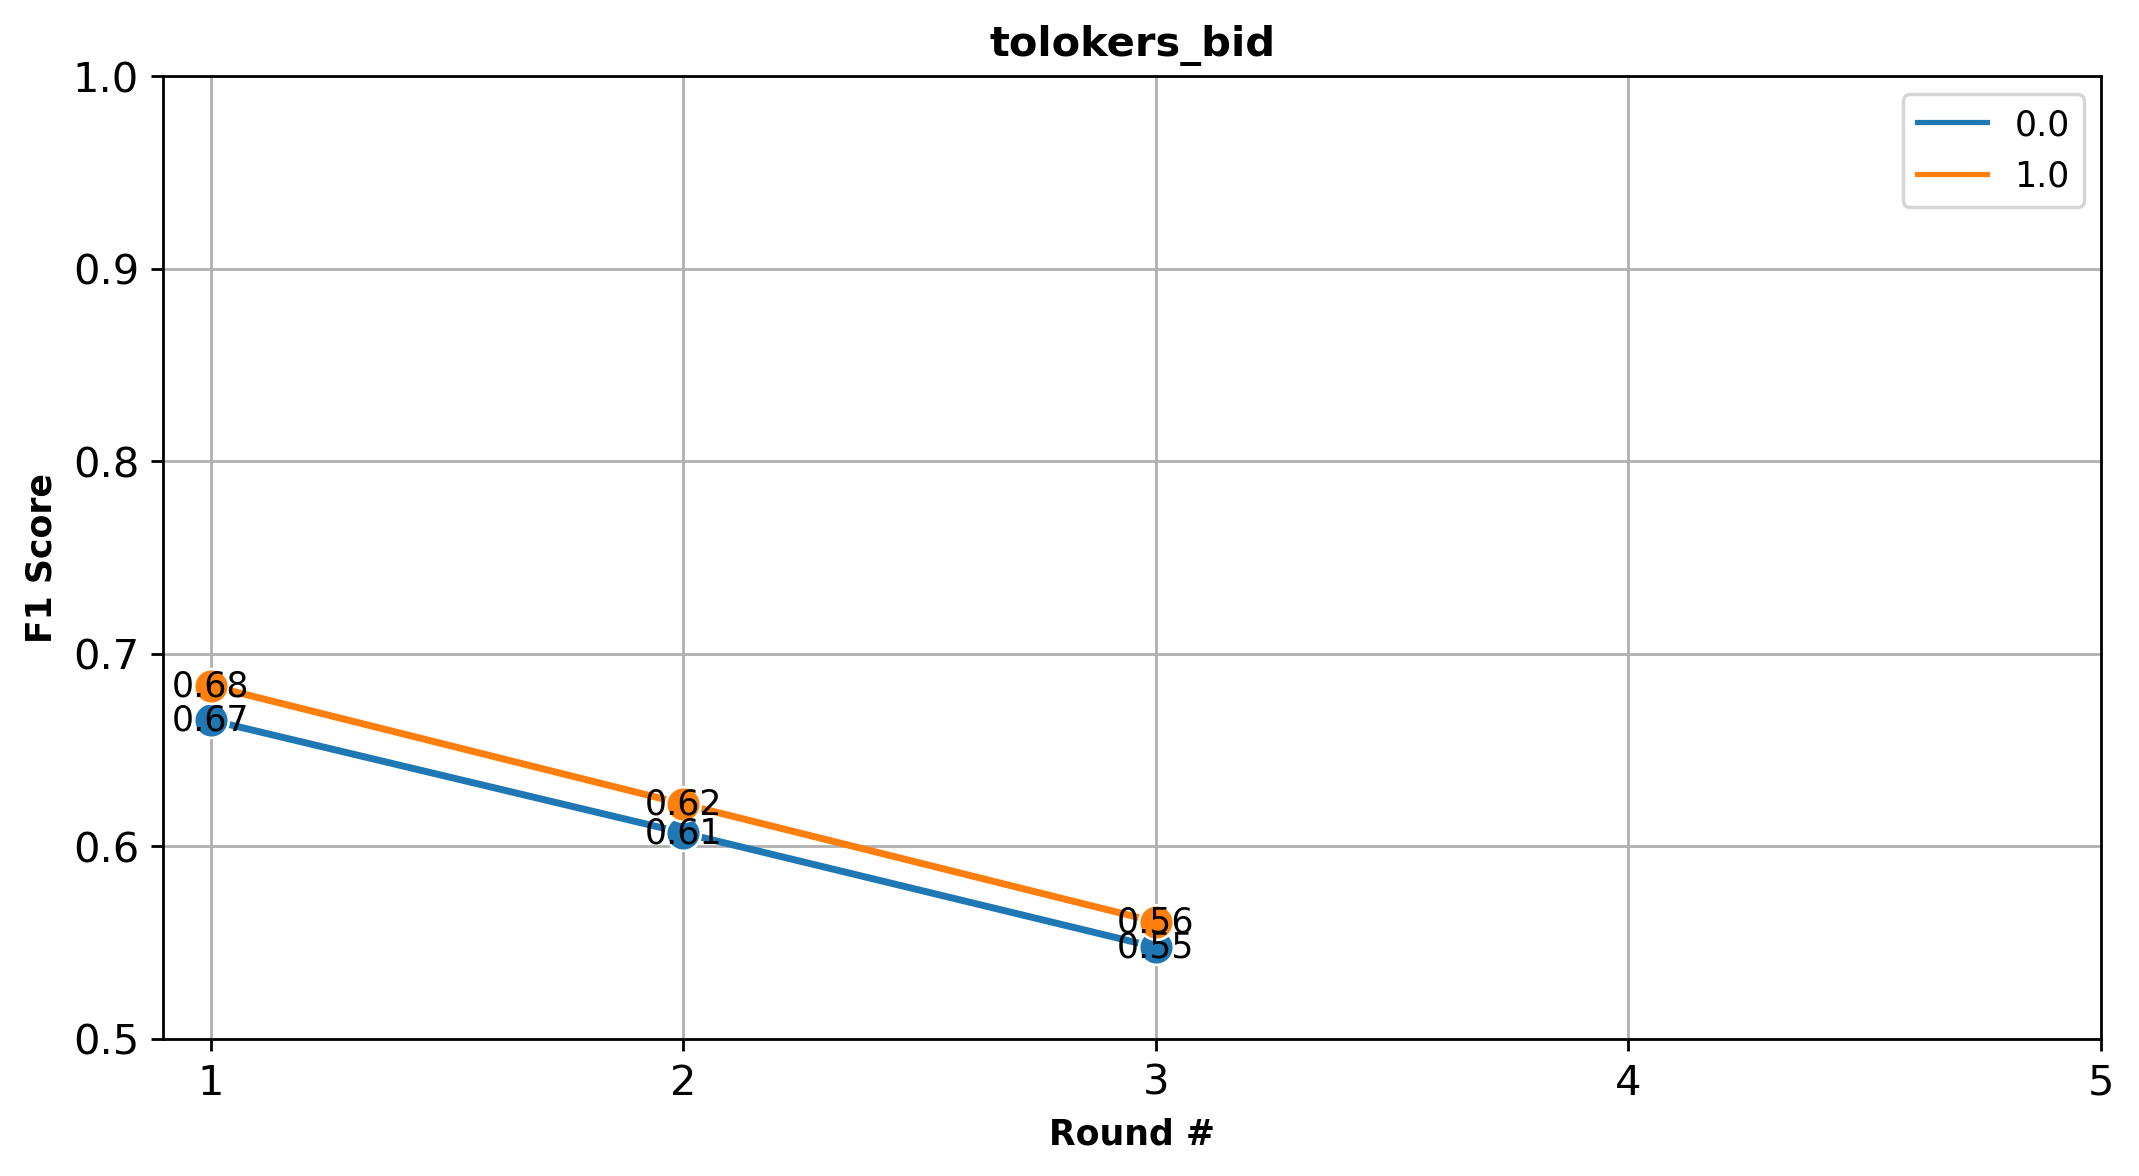


===1.0===


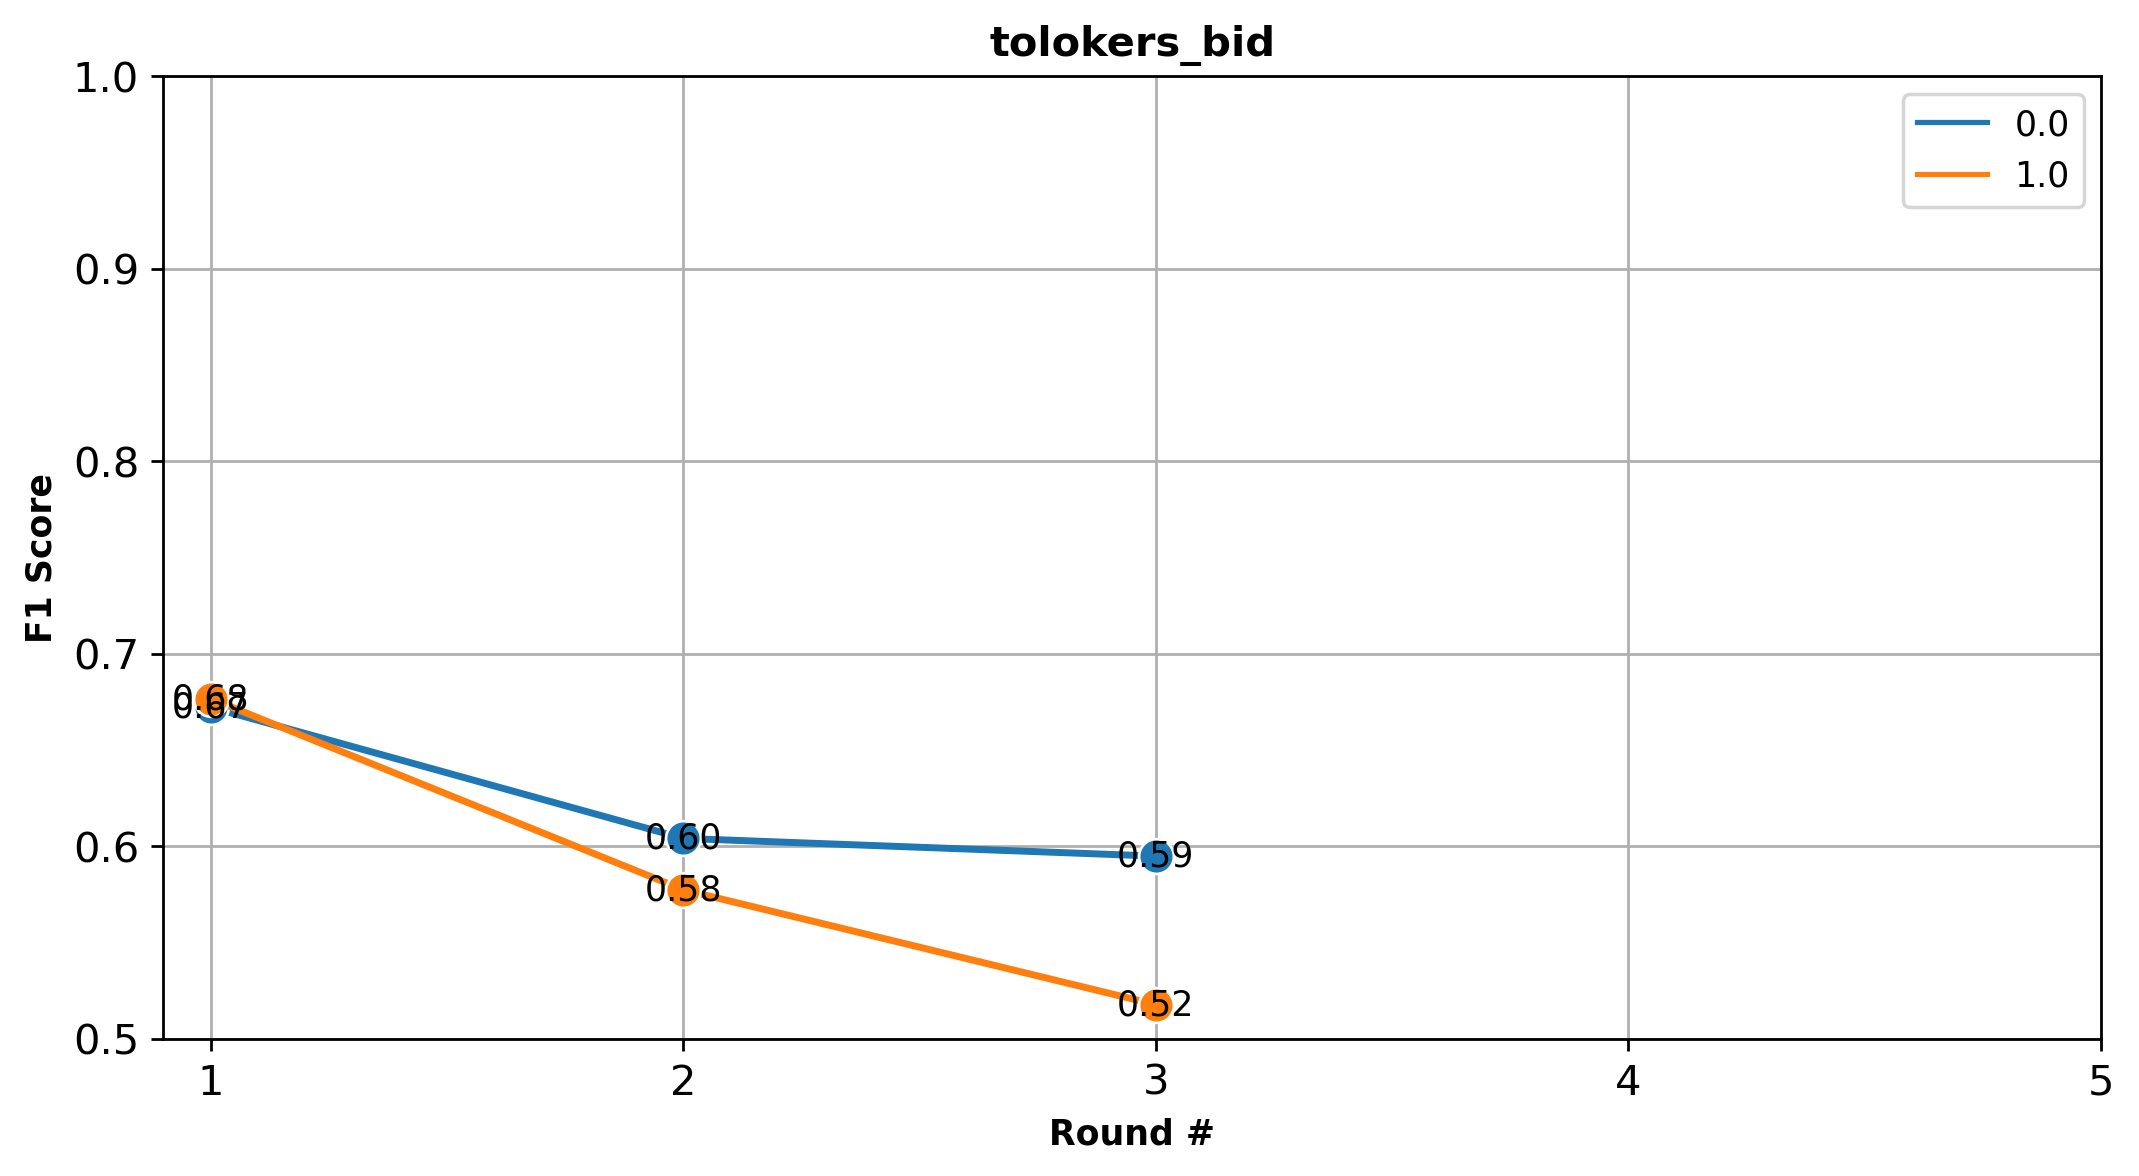

In [15]:
grouper = ['dset_name', 'model_name', 'temporal_agg', 'round_reset_model', 'agg_backbone', 'norm_name', 'beta', 'alpha']

round_df = nbut.read_df(FOLDERNAME, grouper)
round_df['alpha'] = round_df['alpha'].astype(float)
round_df['beta'] = round_df['beta'].astype(float)

grouper = ['alpha', 'dset_name', 'beta']
round_result_df = round_df[round_df.apply(lambda x: x['round'] in x['eval_type'], axis=1)].copy().sort_values(by=['trial', 'round_int'])
round_result_df['alpha'] = round_result_df['alpha'].astype(str)
round_result_df['beta'] = round_result_df['beta'].astype(str)
nbut.print_round_graph(round_result_df, grouper, metric='f1', ylim=(0.5,1))


===0.0TOLOKERS_BID===


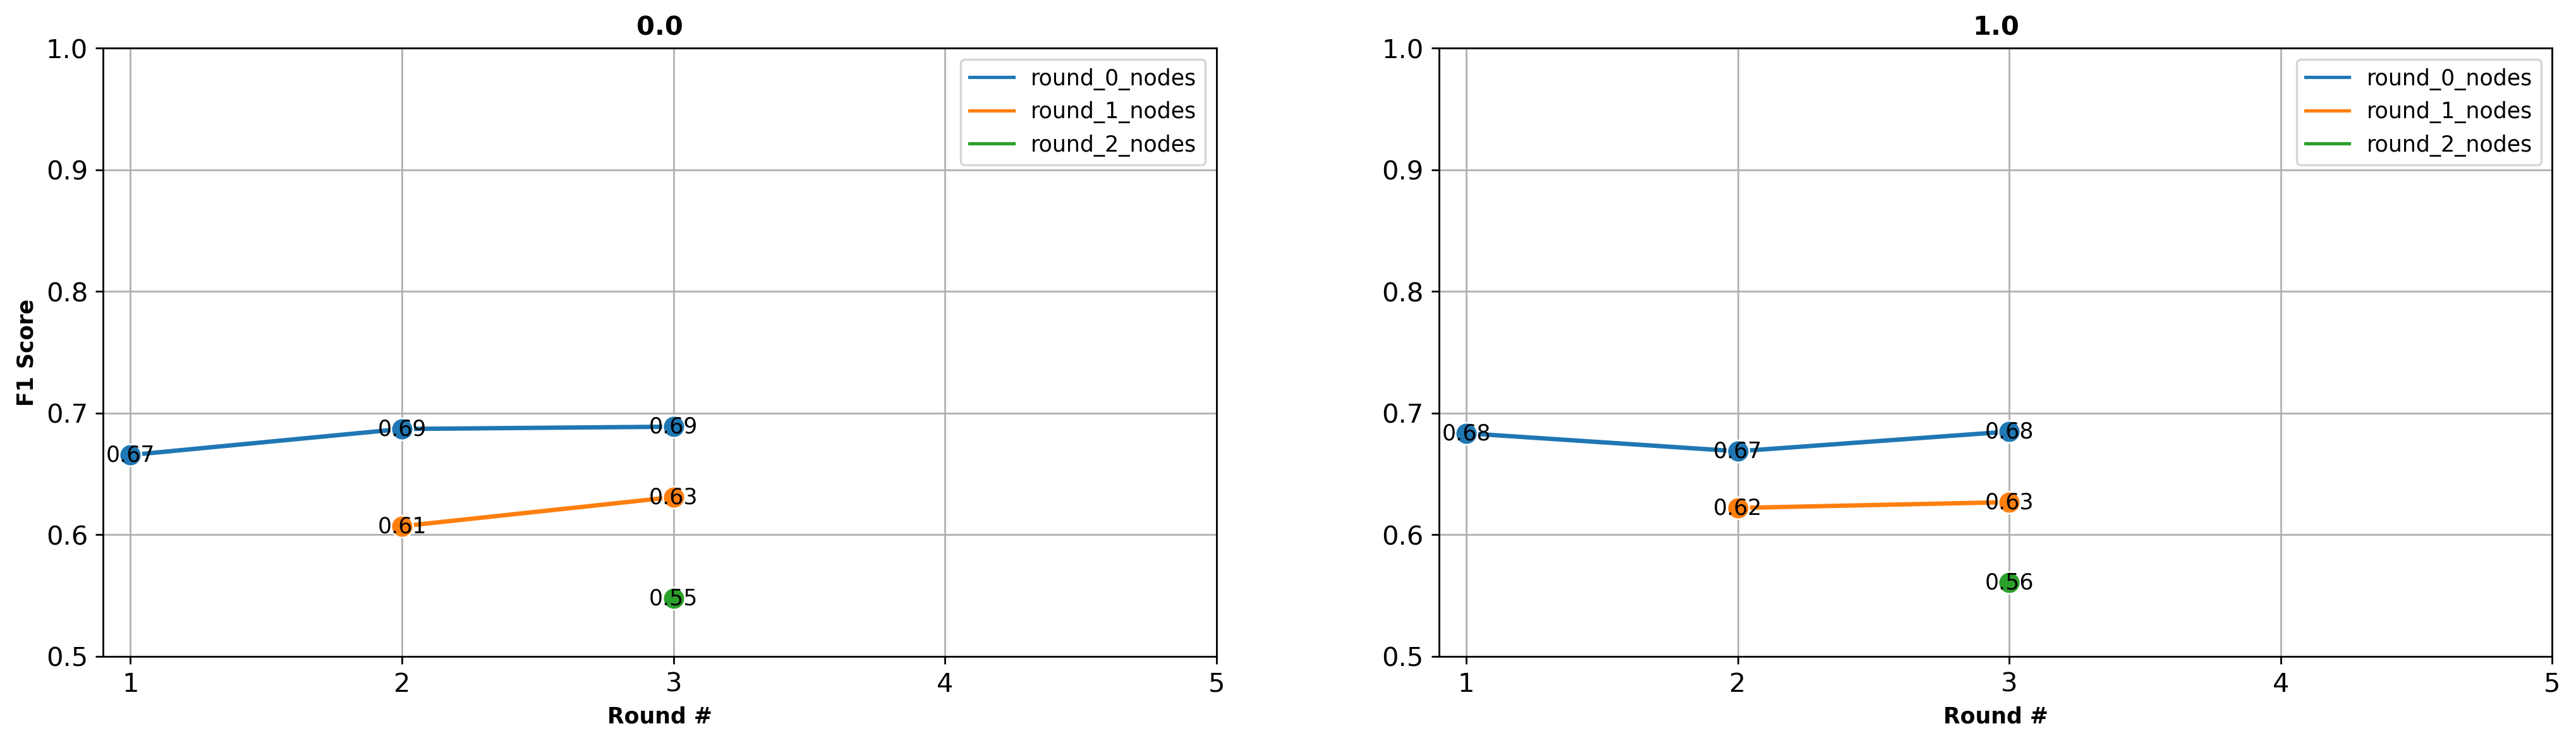


===1.0TOLOKERS_BID===


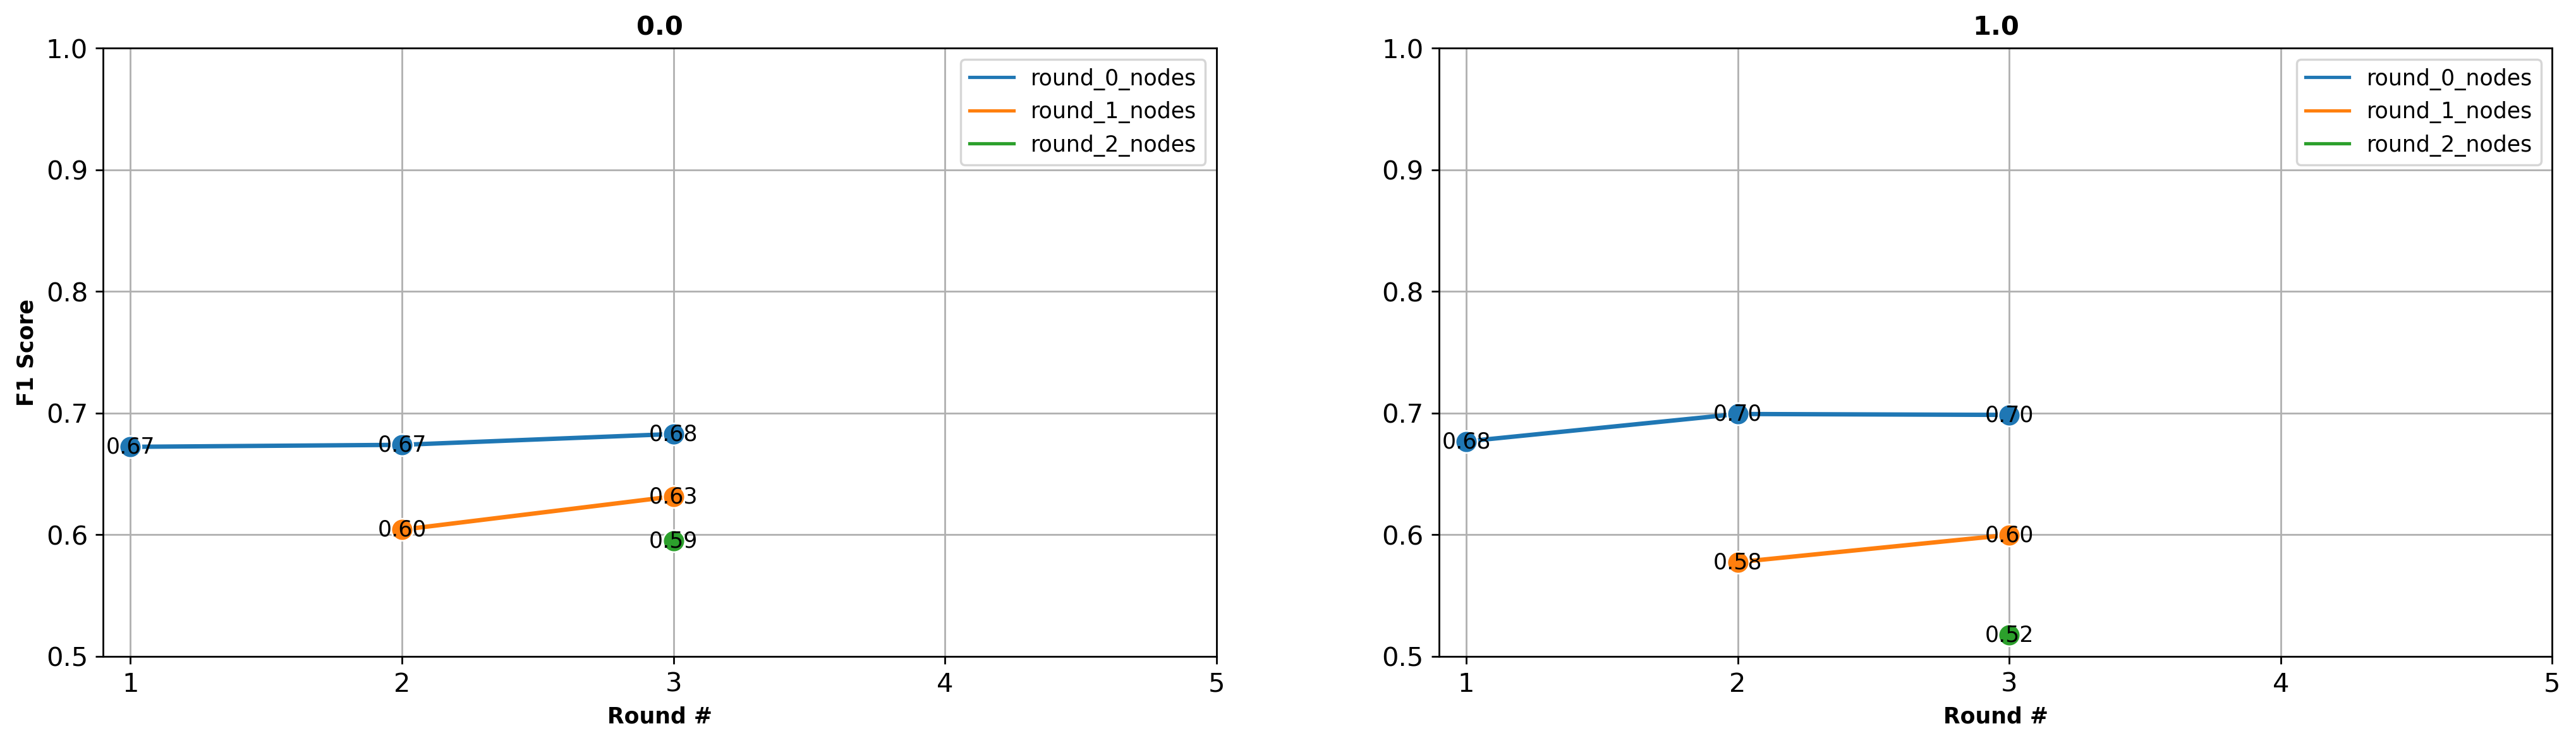

In [17]:
grouper_eval = grouper + ['eval_type']
round_result_df = round_df[round_df.apply(lambda x: 'round' in x['eval_type'], axis=1)].copy().sort_values(by=['trial', 'round_int'])
round_result_df['alpha'] = round_result_df['alpha'].astype(str)
round_result_df['beta'] = round_result_df['beta'].astype(str)
nbut.print_round_graph(round_result_df, grouper_eval, metric='f1', ylim=(0.5,1))